<table>
    <tr>
        <td><img src="./img/Macc.png" width="auto"/></td>
        <td>
            <table><tr>
            <h1 style="color:blue;text-align:center">Lógica para Ciencias de la Computación</h1></td>
            </tr></table>   
        <td>&nbsp;</td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Proyecto Final: Visualización</p></tp>
            <tp><p style="font-size:150%;text-align:center">Juan David Salazar y María Alejandra Rico</p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

# Visualización <a class="anchor" id="comp"></a>

Visualización del problema:

In [18]:
from itertools import combinations
from Logica import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from types import MethodType
xt = [0,1,2,3,4,5,6,7,8,9,"A","B","C","D","E","F"]

def escribir_rejilla(self, literal):
    if '-' in literal:
        atomo = literal[1:]
        neg = ' no'
    else:
        atomo = literal
        neg = ''
    x, y  = self.inv(atomo)
    return f"El número {xt[x]}{neg} está en la casilla ({Y[y]})"

class Rejilla:

    '''
    Clase para representar el problema de poner
    un número distinto en cada una de las casillas
    de una rejilla nxn
    '''

    def __init__(self):
        self.Nx = 16
        self.Ny = 5
        self.Nn = self.Nx*self.Ny
        self.X = list(range(self.Nx))
        self.Y = list(range(self.Ny))
        self.CaracterenCasilla = Descriptor([self.Nx, self.Ny])
        r1 = self.regla1()
        r2 = self.regla2()
        r3 = self.regla3()
        r6 = self.regla6()
        r7 = self.regla7()
        self.reglas = [r1, r2, r3, r6, r7]
        
    def regla1(self):
        formula1 = ''
        formulaF = ''
        inicial2 = True
        from Logica import visualizar_formula

        for x in self.X:
            for y in self.Y:
                inicial = True
                otras_casillas = [(j) for j in self.Y if (j) != (y)]
                for casilla in otras_casillas:
                    u = casilla
                    if inicial:
                        formula1 = self.CaracterenCasilla.P([x,u])
                        inicial = False
                    else:
                        formula1 = "(" + formula1 + "O" + self.CaracterenCasilla.P([x,u]) + ")"

                if inicial2:
                    formulaF = "(" + self.CaracterenCasilla.P([x,y]) + ">-" + formula1 + ")"
                    inicial2 = False
                else:
                    formulaF = "(" + formulaF + "Y" +"(" + self.CaracterenCasilla.P([x,y]) + ">-" + formula1 + ")" + ")"

                
                    
    def regla2(self):
        y = 0
        casilla = (y)
        otras_casillas = [(j) for j in self.Y if (j) != (y)]
        hexadecimal = [11,12,13,14,15]
        formula2 = ''
        inicial = True
        for num in hexadecimal:
            for casilla in otras_casillas:
                u = casilla
                if inicial:
                    formula2 = self.CaracterenCasilla.P([num,u])
                    inicial = False
                else:
                    formula2 = "(" + formula2 + "O" + self.CaracterenCasilla.P([num,u]) + ")"
                
    def regla3(self):
        y = 0
        casilla = y
        pares = [2,4,6,8,10,12,14]
        formula3 = ''
        inicial = True
        for num in pares:
            u = casilla
            if inicial:
                formula3 = self.CaracterenCasilla.P([num,u])
                inicial = False
            else:
                formula3 = "(" + formula3 + "O" + self.CaracterenCasilla.P([num,u]) + ")"
                
    def regla6(self):
        y = 3
        casilla = y
        primos = [2,3,5,7,11,13]
        formula6 = ''
        inicial = True
        for num in primos:
            u = casilla
            if inicial:
                formula6 = self.CaracterenCasilla.P([num,u])
                inicial = False
            else:
                formula6 = "(" + formula6 + "O" + self.CaracterenCasilla.P([num,u]) + ")"

                
    def regla7(self):
        y = 4
        casilla = y
        compuestos = [4,6,8,9,10,12,14,15]
        formula7 = ''
        inicial = True
        for num in compuestos:
            u = casilla
            if inicial:
                formula7 = self.CaracterenCasilla.P([num,u])
                inicial = False
            else:
                formula7 = "(" + formula7 + "O" + self.CaracterenCasilla.P([num,u]) + ")"
                
    def visualizar(self, I):
        fig, axes = plt.subplots()
        N = 5
        M = 1
        fig.set_size_inches(N,M)
        step_x = 1. / N
        step_y = 1. / M
        offset = 0.001
        tangulos = []
        tangulos.append(patches.Rectangle((0, 0), 1, 1, \
        facecolor = 'cornsilk', edgecolor = 'black', linewidth = 2))
        u = N // 2 if N % 2 == 0 else N // 2 + 1 # Filas par o impar
        v = M// 2 if M % 2 == 0 else M // 2 + 1
        for i in range(u + 1):
            for j in range(v):
                tangulos.append(patches.Rectangle((2 * i * step_x, 2 * j * step_y), \
                                                  step_x - offset, step_y, \
                                                  facecolor = 'lightslategrey', \
                                                  ec = 'k', lw = 3))
                tangulos.append(patches.Rectangle((step_x + 2 * i * step_x, (2 * j + 1) * step_y), \
                                                  step_x - offset, step_y, \
                                                  facecolor = 'lightslategrey', \
                                                  ec = 'k', lw = 3))
        for t in tangulos:
            axes.add_patch(t)
        offsetX = 0.065
        offsetY = 0.065
        for k in I:
            X,Y = self.CaracterenCasilla.inv(k)
            if I[k]:
                axes.text(Y * step_x + step_x /2, 0 * step_y + step_y / 2, xt[X], \
                          ha = "center", va = "center", size = 30, c = 'k')
        axes.axis('off')
        plt.show




CPU times: total: 0 ns
Wall time: 12.3 ms


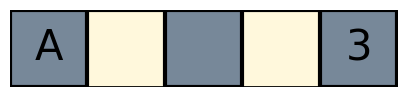

In [21]:
%%time
r = Rejilla()
I = {r.CaracterenCasilla.P([10,0]):True, r.CaracterenCasilla.P([3,4]):True}
r.visualizar(I)